
TABLE 1: BEST PERFORMANCE (Minimizing Relative L2 Error)
-------------------------------------------------------------------------------------
Gamma                     | Min RL2      | Var          | Linf         | Iter    
-------------------------------------------------------------------------------------
gamma = 0.0               | 1.09e-08    | 2.19e-14    | 3.03e-06    | 59528   
gamma = 0.1               | 7.90e-09    | 1.49e-14    | 2.73e-06    | 63038   
gamma = 0.5               | 6.01e-09    | 1.12e-14    | 2.36e-06    | 66420   
gamma = 0.9               | 4.91e-09    | 6.68e-15    | 1.16e-06    | 73808   
gamma = 0.99              | 6.04e-09    | 1.03e-14    | 2.05e-06    | 75724   


TABLE 2: FINAL STATUS (Last Iteration)
-------------------------------------------------------------------------------------
Gamma                     | Final RL2    | Final Var    | Final Linf   | Iter    
------------------------------------------------------------------------------------

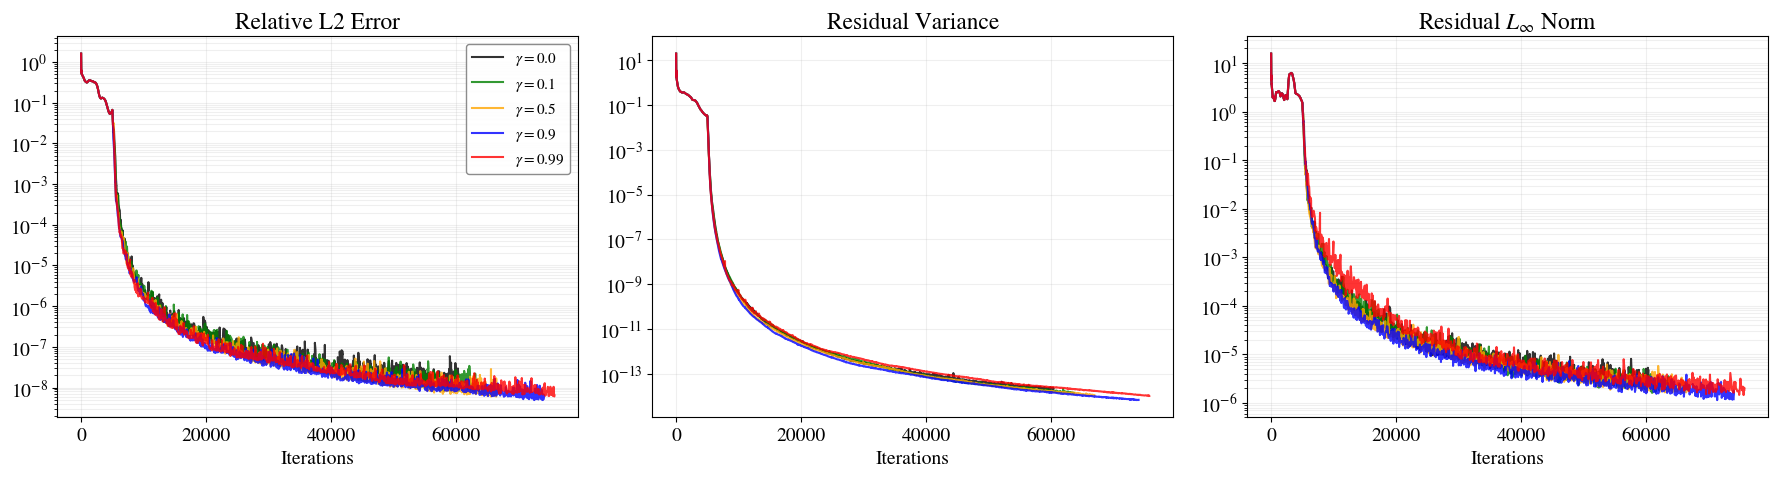

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# --- Global style settings ---
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

# --- Configuration ---
gammas_to_compare = [
    '0.0', 
    '0.1', 
    '0.5', 
    '0.9', 
    '0.99'
]

# Map specific gammas to the requested colors (Black, Green, Orange, Blue, Red)
gamma_map = {
    '0.0':  {'label': r'$\gamma = 0.0$',  'color': 'k'},
    '0.1':  {'label': r'$\gamma = 0.1$',  'color': 'green'},
    '0.5':  {'label': r'$\gamma = 0.5$',  'color': 'orange'},
    '0.9':  {'label': r'$\gamma = 0.9$',  'color': 'blue'},
    '0.99': {'label': r'$\gamma = 0.99$', 'color': 'red'}
}

def get_plot_style(gamma):
    if gamma in gamma_map:
        return gamma_map[gamma]
    else:
        return {'label': gamma, 'color': 'black'}

def plot_comparison(gammas):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    found_data = False

    # Lists to store table data
    rows_best = []
    rows_last = []

    for gamma in gammas:
        # Construct filename for quadratic gamma variations
        filename = f'burgers_pred_quadratic_{gamma}.npz'
        
        if not os.path.exists(filename):
            print(f"Skipping: {filename} (File not found)")
            continue
            
        try:
            data = np.load(filename)
            
            # --- Load Data (EXACTLY AS YOU PROVIDED) ---
            if 'all_its' in data:
                iterations = data['all_its']
            else:
                # Fallback if specific iterations weren't saved
                iterations = np.arange(len(data['loss_history']))

            error = data['error_history']
            res_var = data['var_hist']
            res_linf = data['linf_hist']
            
            style = get_plot_style(gamma)
            clean_name = style['label'].replace('$', '').replace('\\', '')

            # --- PLOTTING ---
            axes[0].plot(iterations, error, label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
            axes[1].plot(iterations, res_var, label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
            axes[2].plot(iterations, res_linf, label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
            
            # --- DATA COLLECTION FOR TABLES ---
            
            # 1. Best Performance (Min L2 Error)
            idx_best = np.argmin(error)
            
            r_best_l2   = error[idx_best]
            r_best_var  = res_var[idx_best]
            r_best_linf = res_linf[idx_best]
            r_best_iter = iterations[idx_best]
            
            rows_best.append([clean_name, r_best_l2, r_best_var, r_best_linf, r_best_iter])

            # 2. Last Iteration Performance
            r_last_l2   = error[-1]
            r_last_var  = res_var[-1]
            r_last_linf = res_linf[-1]
            r_last_iter = iterations[-1]

            rows_last.append([clean_name, r_last_l2, r_last_var, r_last_linf, r_last_iter])

            found_data = True
            
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue

    if not found_data:
        print("No valid data files found to plot.")
        return

    # --- Formatting ---
    titles = ["Relative L2 Error", "Residual Variance", r"Residual $L_{\infty}$ Norm"]
    
    for i, ax in enumerate(axes):
        ax.set_title(titles[i])
        ax.set_xlabel("Iterations")
        ax.set_yscale('log')
        ax.grid(True, which="both", ls="-", alpha=0.2)

    # Legend
    axes[0].legend(fontsize=11, loc='best', framealpha=0.9, edgecolor='gray')

    plt.tight_layout()
    plt.savefig("Comparison_Gamma_Fixed.png", dpi=300, bbox_inches='tight')
    
    # --- PRINT TABLES ---

    # Table 1: Best Performance
    print("\n" + "="*85)
    print(f"TABLE 1: BEST PERFORMANCE (Minimizing Relative L2 Error)")
    print("-" * 85)
    print(f"{'Gamma':<25} | {'Min RL2':<12} | {'Var':<12} | {'Linf':<12} | {'Iter':<8}")
    print("-" * 85)
    for r in rows_best:
        print(f"{r[0]:<25} | {r[1]:<.2e}    | {r[2]:<.2e}    | {r[3]:<.2e}    | {int(r[4]):<8}")
    print("="*85 + "\n")

    # Table 2: Final Status
    print("\n" + "="*85)
    print(f"TABLE 2: FINAL STATUS (Last Iteration)")
    print("-" * 85)
    print(f"{'Gamma':<25} | {'Final RL2':<12} | {'Final Var':<12} | {'Final Linf':<12} | {'Iter':<8}")
    print("-" * 85)
    for r in rows_last:
        print(f"{r[0]:<25} | {r[1]:<.2e}    | {r[2]:<.2e}    | {r[3]:<.2e}    | {int(r[4]):<8}")
    print("="*85 + "\n")

    plt.show()

if __name__ == "__main__":
    plot_comparison(gammas_to_compare)


  ROBUST METRIC ANALYSIS (Calculated from Fields with History Fallback)
Gamma           | Rel L2 Error    | Res L_inf       | Res Var         | Source
-------------------------------------------------------------------------------------
0.0             | 1.55e-08        | 4.79e-06        | 1.28e-14        | Field
0.1             | 8.25e-09        | 4.05e-06        | 8.23e-15        | Field
0.5             | 7.43e-09        | 1.95e-06        | 6.19e-15        | Field
0.9             | 5.39e-09        | 2.36e-06        | 3.91e-15        | Field
0.99            | 6.62e-09        | 2.57e-06        | 5.61e-15        | Field
-------------------------------------------------------------------------------------
WINNER: Gamma = 0.9 (L2: 5.39e-09)
BASELINE (Gamma=0.0): 1.55e-08
IMPROVEMENT: 2.9x


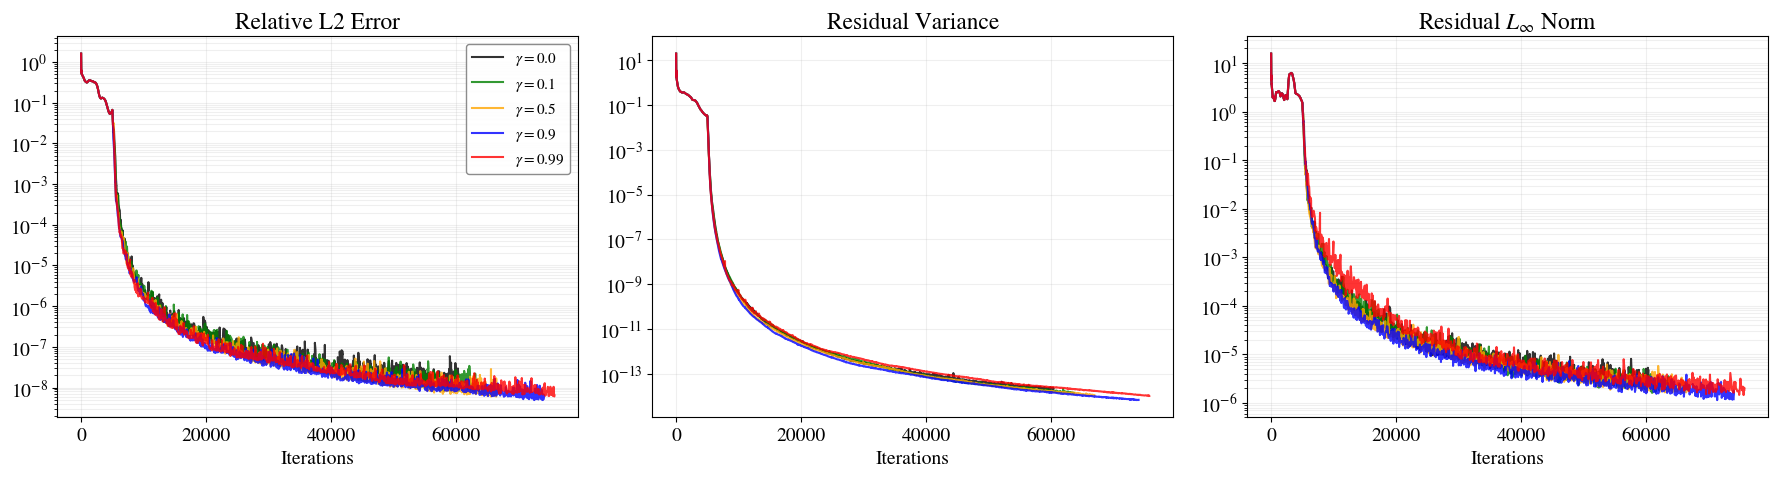

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# --- Global style settings ---
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

# --- Configuration ---
gammas_to_compare = ['0.0', '0.1', '0.5', '0.9', '0.99']

gamma_map = {
    '0.0':  {'label': r'$\gamma = 0.0$',  'color': 'k'},
    '0.1':  {'label': r'$\gamma = 0.1$',  'color': 'green'},
    '0.5':  {'label': r'$\gamma = 0.5$',  'color': 'orange'},
    '0.9':  {'label': r'$\gamma = 0.9$',  'color': 'blue'},
    '0.99': {'label': r'$\gamma = 0.99$', 'color': 'red'}
}

# --- 1. Robust Data Loading ---
def load_data_package(gamma):
    filename = f'burgers_pred_quadratic_{gamma}.npz'
    
    if not os.path.exists(filename):
        return None

    try:
        data = np.load(filename)
        keys = list(data.keys())
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None
    
    # --- A. Fields (For Table Calculation) ---
    Exact, Pred, Resid = None, None, None
    
    # 1. Exact Solution
    if 'u_exact' in keys: Exact = data['u_exact']
    elif 'u_ref' in keys: Exact = data['u_ref']
    elif 'Exact' in keys: Exact = data['Exact']
    
    # 2. Prediction
    if 'u' in keys: Pred = data['u']
    elif 'u_pred' in keys: Pred = data['u_pred']
    elif 'Pred' in keys: Pred = data['Pred']
    
    # 3. Residual Field
    for k in ['res_grid', 'residual_field', 'f', 'f_pred', 'F', 'residual', 'res']:
        if k in keys: Resid = data[k]; break

    # Align Shapes if needed
    if Exact is not None and Pred is not None:
        if Exact.shape != Pred.shape:
             if Exact.T.shape == Pred.shape: Exact = Exact.T

    # --- B. History (For Plotting & Fallback) ---
    h_l2, h_linf, h_var, iterations = None, None, None, None

    # Iterations
    if 'all_its' in keys: iterations = data['all_its']
    else: iterations = np.arange(len(data['loss_history'])) if 'loss_history' in keys else None

    # L2 History
    if 'error_history' in keys: h_l2 = data['error_history']
    elif 'error_hist' in keys: h_l2 = data['error_hist']
    
    # Linf History
    if 'linf_hist' in keys: h_linf = data['linf_hist']
    
    # Variance History
    if 'var_hist' in keys: h_var = data['var_hist']

    return {
        'gamma': gamma,
        'Exact': Exact, 'Pred': Pred, 'Res': Resid,
        'hist_l2': h_l2, 'hist_linf': h_linf, 'hist_var': h_var, 'iterations': iterations
    }

# --- 2. Metric Calculation Logic ---
def calculate_metrics(pkg):
    if pkg is None: return None
    
    Exact = pkg['Exact']
    Pred = pkg['Pred']
    Res = pkg['Res']
    
    # 1. Base Metrics from Fields (True Calculation)
    f_l2 = np.inf
    f_linf = np.inf
    f_var = np.inf
    
    # Compute L2 relative error from fields
    if Exact is not None and Pred is not None:
        ref_norm = np.linalg.norm(Exact)
        f_l2 = np.linalg.norm(Exact - Pred) / ref_norm if ref_norm > 1e-16 else np.inf
        
    # Compute Residual metrics from fields
    if Res is not None:
        f_linf = np.max(np.abs(Res))
        f_var = np.var(Res)
        
    # 2. Stability Check (Use History if Unstable)
    final_l2 = f_l2
    final_linf = f_linf
    final_var = f_var
    source = "Field"
    
    # If L2 is exploded (> 1.0) or NaN, check history for the best epoch
    if f_l2 > 1.0 or np.isnan(f_l2):
        if pkg['hist_linf'] is not None and len(pkg['hist_linf']) > 0:
            try:
                # Find index where Residual L_inf was lowest (usually best model checkpoint)
                best_idx = np.nanargmin(pkg['hist_linf'])
                
                if pkg['hist_l2'] is not None and best_idx < len(pkg['hist_l2']):
                    final_l2 = pkg['hist_l2'][best_idx]
                    final_linf = pkg['hist_linf'][best_idx]
                    
                    if pkg['hist_var'] is not None and best_idx < len(pkg['hist_var']):
                        final_var = pkg['hist_var'][best_idx]
                    else:
                        final_var = np.nan
                    source = f"Hist[{best_idx}]"
            except:
                pass

    return {
        'gamma': pkg['gamma'],
        'l2': final_l2,
        'linf': final_linf,
        'var': final_var,
        'source': source
    }

def get_plot_style(gamma):
    return gamma_map.get(gamma, {'label': gamma, 'color': 'black'})

# --- 3. Main Plotting & Analysis ---
def plot_gamma_analysis(gammas):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    found_data = False
    
    table_rows = []

    for gamma in gammas:
        # Load Data Package
        pkg = load_data_package(gamma)
        if pkg is None:
            print(f"Skipping: gamma={gamma} (File not found)")
            continue
        
        # --- A. Plotting (Using Histories) ---
        style = get_plot_style(gamma)
        its = pkg['iterations']
        h_l2 = pkg['hist_l2']
        h_var = pkg['hist_var']
        h_linf = pkg['hist_linf']
        
        # Ensure we have data to plot
        if its is not None and h_l2 is not None:
            axes[0].plot(its, h_l2, label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
        
        if its is not None and h_var is not None:
            # Handle length mismatch if dense/sparse
            min_len = min(len(its), len(h_var))
            axes[1].plot(its[:min_len], h_var[:min_len], label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
            
        if its is not None and h_linf is not None:
            min_len = min(len(its), len(h_linf))
            axes[2].plot(its[:min_len], h_linf[:min_len], label=style['label'], color=style['color'], linewidth=1.5, alpha=0.8)
            
        found_data = True

        # --- B. Table Calculation (Using Robust Logic) ---
        metrics = calculate_metrics(pkg)
        table_rows.append(metrics)

    if not found_data:
        print("No valid data files found.")
        return

    # --- Formatting Plots ---
    titles = ["Relative L2 Error", "Residual Variance", r"Residual $L_{\infty}$ Norm"]
    for i, ax in enumerate(axes):
        ax.set_title(titles[i])
        ax.set_xlabel("Iterations")
        ax.set_yscale('log')
        ax.grid(True, which="both", ls="-", alpha=0.2)

    axes[0].legend(fontsize=11, loc='best', framealpha=0.9, edgecolor='gray')
    plt.tight_layout()
    plt.savefig("Comparison_Gamma_Robust.png", dpi=300, bbox_inches='tight')

    # --- Print Robust Table ---
    print(f"\n=====================================================================================")
    print(f"  ROBUST METRIC ANALYSIS (Calculated from Fields with History Fallback)")
    print(f"=====================================================================================")
    print(f"{'Gamma':<15} | {'Rel L2 Error':<15} | {'Res L_inf':<15} | {'Res Var':<15} | {'Source'}")
    print("-" * 85)

    # Sort rows by gamma value for cleanliness (optional, strictly assumes numeric strings)
    # table_rows.sort(key=lambda x: float(x['gamma']))

    candidates = []

    for m in table_rows:
        l2_str = f"{m['l2']:.2e}" if m['l2'] != np.inf else "N/A"
        linf_str = f"{m['linf']:.2e}" if m['linf'] != np.inf else "N/A"
        var_str = f"{m['var']:.2e}" if m['var'] != np.inf and not np.isnan(m['var']) else "N/A"
        
        print(f"{m['gamma']:<15} | {l2_str:<15} | {linf_str:<15} | {var_str:<15} | {m['source']}")
        candidates.append(m)

    # Winner Analysis
    if candidates:
        valid_candidates = [c for c in candidates if c['l2'] != np.inf and not np.isnan(c['l2'])]
        if valid_candidates:
            valid_candidates.sort(key=lambda x: x['l2'])
            winner = valid_candidates[0]
            
            print("-" * 85)
            print(f"WINNER: Gamma = {winner['gamma']} (L2: {winner['l2']:.2e})")
            
            # Compare with Baseline (0.0)
            baseline = next((x for x in candidates if x['gamma'] == '0.0'), None)
            if baseline and baseline['l2'] != np.inf:
                print(f"BASELINE (Gamma=0.0): {baseline['l2']:.2e}")
                if winner['l2'] < baseline['l2']:
                    improv = baseline['l2'] / winner['l2']
                    print(f"IMPROVEMENT: {improv:.1f}x")
    
    plt.show()

if __name__ == "__main__":
    plot_gamma_analysis(gammas_to_compare)